# Name: Kotut Bill Kipkorir 
# RegNo: 18/03308

# Principles of Datascience

# This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

In [155]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import ffmpeg

from matplotlib.animation import FuncAnimation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import wandb

import warnings
warnings.filterwarnings(action='ignore')

# Loading the data

In [156]:
forestdata = pd.read_csv("http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv")
forestdata

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [157]:
#Cleaning the data and checking for null values
forestdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# 'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation


# 'Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 2nd selected feature was atually one of the attributes with the highest correlation with the 'Area

In [158]:
forestdata.isnull()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


In [159]:
forestdata.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

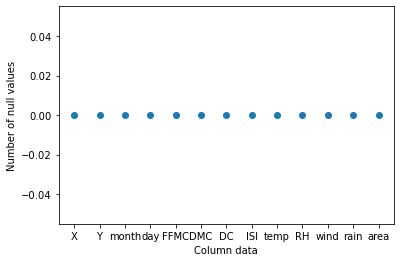

In [160]:
plt.scatter(forestdata.columns.values, forestdata.isnull().sum().values,  cmap="viridis")
plt.xlabel('Column data')
plt.ylabel('Number of null values')
plt.show()

In [161]:
forestdata.shape

(517, 13)

In [162]:
forestdata.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [163]:
forestdata['day']

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

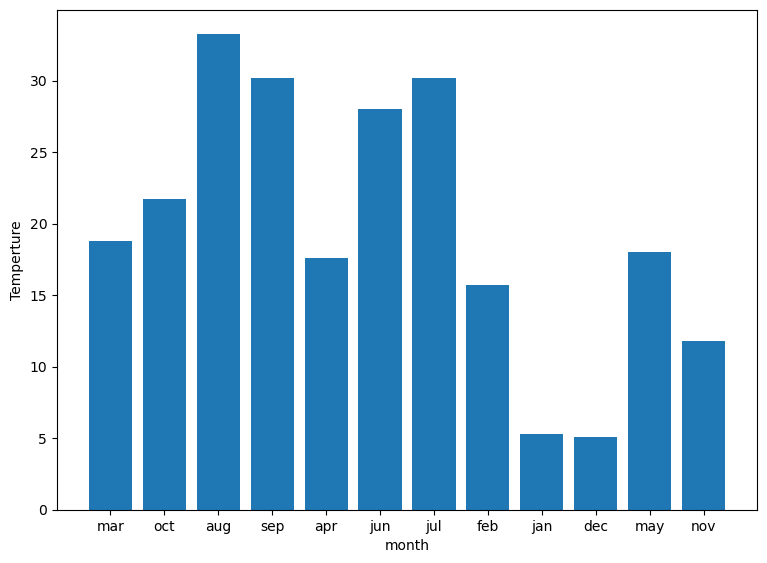

In [164]:
fig = plt.figure(figsize=(7,5),dpi=100)
axes = fig.add_axes([0,0,1,1])
x1 = np.array(forestdata['month'])
y1 = np.array(forestdata['temp'])

axes.bar(forestdata['month'], forestdata['temp'])
axes.set_xlabel('month')
axes.set_ylabel('Temperture')
plt.show()

In [165]:
forestdata['day'] = forestdata['day'].replace(['sun','mon','tue','wed','thu','fri','sat'], [1,2,3,4,5,6,7])


In [166]:
forestdata['month'] = forestdata['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [1,2,3,4,5,6,7,8,9,10,11,12])

In [167]:
forestdata['day']

0      6
1      3
2      7
3      6
4      1
      ..
512    1
513    1
514    1
515    7
516    3
Name: day, Length: 517, dtype: int64

In [168]:
forestdata['month']

0       3
1      10
2      10
3       3
4       3
       ..
512     8
513     8
514     8
515     8
516    11
Name: month, Length: 517, dtype: int64

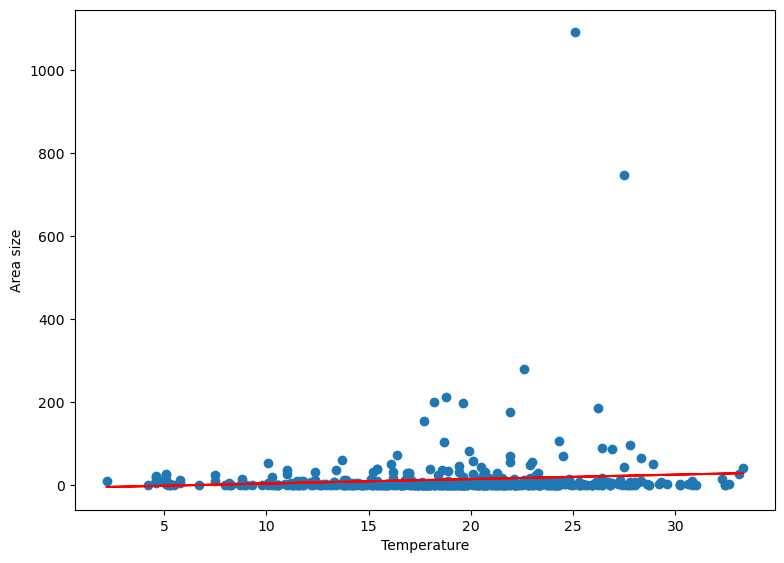

In [169]:
fig = plt.figure(figsize=(7,5),dpi=100)
axes = fig.add_axes([0,0,1,1])
x1 = np.array(forestdata['temp'])
y1 = np.array(forestdata['area'])

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b, color = 'red')
axes.scatter(forestdata['temp'], forestdata['area'])
axes.set_xlabel('Temperature')
axes.set_ylabel('Area size')
plt.show()

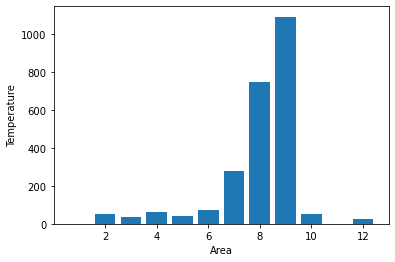

In [170]:
plt.bar(forestdata.month, forestdata.area)
plt.xlabel('Area')
plt.ylabel('Temperature')

plt.show()

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

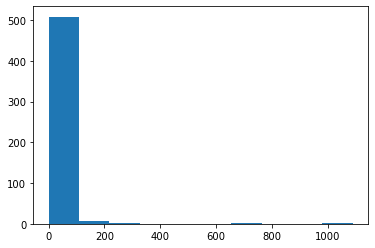

In [171]:
plt.hist((forestdata.area))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

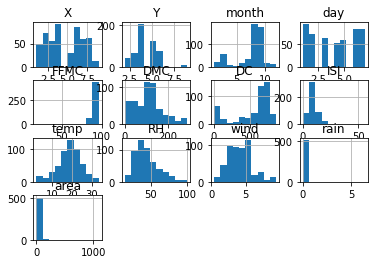

In [172]:
forestdata.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

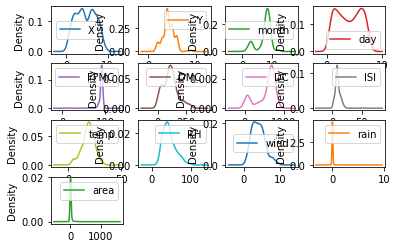

In [173]:
forestdata.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

[Text(0, 0, 'X'),
 Text(0, 1, 'Y'),
 Text(0, 2, 'month'),
 Text(0, 3, 'day'),
 Text(0, 4, 'FFMC'),
 Text(0, 5, 'DMC'),
 Text(0, 6, 'DC'),
 Text(0, 7, 'ISI'),
 Text(0, 8, 'temp'),
 Text(0, 9, 'RH'),
 Text(0, 10, 'wind'),
 Text(0, 11, 'rain'),
 Text(0, 12, 'area')]

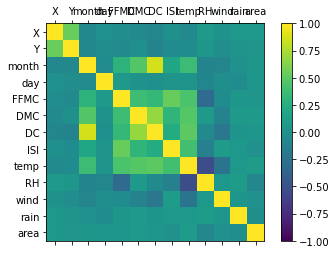

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(forestdata.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(forestdata.columns)
ax.set_yticklabels(forestdata.columns)

In [175]:
forestdata.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.972921,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.143867,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [176]:
forestdata

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [177]:
X = forestdata.iloc[:, 0:12].values.astype(int)
y = forestdata.iloc[:,12].values.astype(int)

In [178]:
X

array([[ 7,  5,  3, ..., 51,  6,  0],
       [ 7,  4, 10, ..., 33,  0,  0],
       [ 7,  4, 10, ..., 33,  1,  0],
       ...,
       [ 7,  4,  8, ..., 70,  6,  0],
       [ 1,  4,  8, ..., 42,  4,  0],
       [ 6,  3, 11, ..., 31,  4,  0]])

In [179]:
y

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    1,   

# Encoding Categorical Data

In [180]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import utils
from sklearn import preprocessing

labelencoder_X1 = LabelEncoder()
X[:, 2] = labelencoder_X1.fit_transform(X[:, 2]) #For month
print(X[:, 2] )
print("\n")
    
    
labelencoder_X2 = preprocessing.LabelEncoder()
X[:, 3] = labelencoder_X2.fit_transform(X[:, 3]) #For weekday
print(X[:, 3] )
print("\n")
    

#onehotenc    oder = OneHotEncoder(categorical_features = [2])#dummy variable for month
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]
    
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2])], remainder = 'passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.int64)
X = X[:, 1:]
    
#onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]
    
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [13])], remainder = 'passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.int64)
X = X[:, 1:]
   
print(X) 
print(utils.multiclass.type_of_target(X))
print(utils.multiclass.type_of_target(X.astype('int')))
print(utils.multiclass.type_of_target(X))
    

[ 2  9  9  2  2  7  7  7  8  8  8  8  7  8  8  8  2  9  2  3  8  8  5  7
  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  2  6  7  7  8  8  8  8  6
  2  2  8  7  7  7  7  8  8  9  1  1  2  2  7  7  7  7  8  8  8  2  2  8
  2  7  8  1  1  2  7  7  7  7  7  7  7  8  8  8  8  2  7  2  7  7  7  8
  1  2  7  7  7  7  7  8  0  2  2  7  8  8  2  2  8  8  2  2  2  2  2  7
  7  7  8  8  8  9  2  8  9  9  1  2  2  8  2  7  8  8  6  8  8  7  7  6
  7  7  2  8  7  8  5  6  6  8  8  7  8  7  7  8  2  7  2  8  8  2  7  7
  2  7  8  7  7  8  7  7  3  7  8  7  8  9  1  9  7  8  2  8  2  2  2  7
  7  8  7  7  3  8  8  8  8  2  1  9  2  8  7  8  8  8  9  7  8  2  2  2
  8  8  8  2  7  8  2  6  8  8  9  7  8  7  8  8  8  8  8  7  8  8  8  3
  3  3  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7 11 11 11 11 11 11 11 11 11  1  1  1  6  6  6
  6  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  4  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8

In [181]:
forestdata

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Train and Test 

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)



In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
X_train

array([[-0.43852901, -0.40671063, -0.3151044 , ...,  2.01555358,
         1.90985524, -0.07390951],
       [-0.43852901, -0.40671063, -0.3151044 , ..., -0.77184892,
         1.36216317, -0.07390951],
       [-0.43852901, -0.40671063,  3.17355141, ..., -0.58179875,
         0.26677904, -0.07390951],
       ...,
       [-0.43852901, -0.40671063, -0.3151044 , ..., -0.26504846,
         0.26677904, -0.07390951],
       [-0.43852901, -0.40671063, -0.3151044 , ..., -0.32839852,
        -0.8286051 , -0.07390951],
       [-0.43852901,  2.45875061, -0.3151044 , ..., -1.40534949,
         0.26677904, -0.07390951]])

In [185]:
X_test

array([[ 2.28035085, -0.40671063, -0.3151044 , ...,  0.11505188,
         0.81447111, -0.07390951],
       [-0.43852901, -0.40671063, -0.3151044 , ...,  0.43180216,
        -1.37629716, -0.07390951],
       [ 2.28035085, -0.40671063, -0.3151044 , ...,  0.43180216,
         0.26677904, -0.07390951],
       ...,
       [-0.43852901, -0.40671063, -0.3151044 , ..., -1.02524915,
        -1.37629716, -0.07390951],
       [-0.43852901, -0.40671063, -0.3151044 , ..., -1.21529932,
         0.26677904, -0.07390951],
       [-0.43852901, -0.40671063, -0.3151044 , ...,  2.26895381,
         0.26677904, -0.07390951]])

In [186]:
y_train

array([  3,   0,   0,   0,  11,   0,   1,   1,   2,   5,   2,   0,   0,
        24,   0,   1,   6,   0,   0,   7,   0,   0,  35,   0,   0,   9,
         0,   0,   0,   0,   0,   0,   0,   4,   3,   0,   2,   0,   0,
         3,   0,  39,   0,  86,   0,   8,   3,   5,   0,   0,   0,   4,
         0, 103,   0,   0,   0,   0,   0,  11, 746,   3,   0,  31,   0,
         0,   0,   0,   0,  13,   6,  30,   0,   0,   0,   1,   0,   0,
         0,  26,   0,   5,  20,   1,  28,   0,   8,  28,   1,  13, 154,
         1,   0,   0,  29,   0,  37,   0,   0,   2,   0,   0,   0,  11,
         0,   0,   0,   1,   0,   0,   6,   0,  64,   1,   0,   0,  10,
         0,   1,   1,   0,   1,   0,   0,   0, 212,   8,   1,   3,   2,
         3,   0,   0,   0,   0,   0,   0,   4,  49,   0,   0,   2,   0,
         9,   0,   0,   6,   0,   1,   5,   6,   0,   6,   2,   0,   5,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23,
         0,   7,   0,   0,  36,   0,  51, 174,   0,   7,   0,  3

In [187]:
y_test

array([  27,    0,    2,   88,    2,    0,    1,    0,   16,    0,    2,
         22,   10,    0,   18,    0,    1,   43,    1,    7,    0,    3,
          4,    5,   70,   24,    0,    0,    0,    0,    0,    3,    0,
          8,    5,  196,    0,    1, 1090,    0,   54,    0,    0,    0,
          0,    1,    6,    0,    1,    2,    5,   11,    0,   34,    6,
          0,    0,    0,    7,   32,    0,    0,    8,   48,   37,  200,
          0,    3,    0,   46,   10,    0,    0,    4,    2,    0,    0,
          0,    5,    0,    3,    0,    0,    0,    0,   11,    2,    6,
          2,    0,   40,  105,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    1,    0,   24,    0,   82,    0,   71,    2,
          4,    0,    0,    0,   15,   24,   11,    0,    3,    3,    0,
          3,   10,    0,    3,    0,    1,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    6,   14,   95,    0,    4,
          0,    0,    7,   16,    0,   16,    0,   

In [188]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [189]:
#Best intercept values
model.intercept_

array([ 6.13917564e+00,  3.45602195e+00,  3.16326174e+00,  2.84436609e+00,
        1.53078651e+00,  1.99789988e+00,  2.86632585e+00,  5.81104600e-01,
        2.13260661e+00, -1.16956695e-01, -1.04784893e+00,  6.97983130e-01,
        1.00613428e+00,  9.14542205e-01, -6.99242264e-01, -5.44979758e-01,
       -9.69622411e-01, -1.92276694e+00, -8.13119613e-01,  3.67076422e-01,
        1.70715370e-03,  6.61091153e-02, -1.07973578e+00, -5.02965447e-01,
       -7.86400743e-01, -1.04916318e+00, -1.92588416e+00, -3.88303623e-01,
       -1.07181832e+00, -1.05649403e+00, -1.14213730e+00, -6.54151647e-01,
       -4.42405917e-01, -1.72928553e+00, -6.67173597e-01, -1.43213150e+00,
       -1.42126496e+00, -4.33436357e-01, -3.17608342e-01, -7.00518691e-01,
       -1.33640726e+00, -1.13736448e+00, -8.57283890e-01, -1.51862981e+00])

In [190]:
#Best slope values
model.coef_

array([[ 3.88747736e-02, -1.41883088e-01,  3.99327142e-02, ...,
         6.97728604e-02, -2.22947451e-02, -1.76557762e-01],
       [ 1.71068767e-01, -6.68623370e-02,  3.27687448e-01, ...,
        -1.11211160e-01,  8.48687058e-02, -2.09502333e-01],
       [ 4.95249878e-01,  1.66531670e-01,  3.28795710e-01, ...,
         3.80195145e-01,  8.75998740e-02,  3.10867576e-01],
       ...,
       [-1.01446774e-01,  7.87345962e-01, -4.94336264e-02, ...,
        -6.11819503e-02, -3.70344319e-01, -6.73805451e-04],
       [ 7.94559514e-01, -2.58901297e-01, -1.00545520e-01, ...,
         5.39566635e-01,  2.32052110e-01, -8.85940746e-03],
       [-1.09688171e-01, -7.25583055e-02, -1.21182227e-01, ...,
        -3.97476955e-01,  2.48315754e-01, -8.20856000e-03]])

In [191]:
model.score(X_train, y_train)

0.6064516129032258

In [192]:
model.score(X_test,y_test)

0.4444444444444444

# .score() returns the coefficient of determination, or R², for the data passed. Its maximum is 1. The higher the R² value, the better the fit. In this case, the training data yields a slightly higher coefficient. However, the R² calculated with test data is an unbiased measure of your model’s prediction performance.

In [193]:
model.classes_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  17,  20,  23,  24,  26,  28,  29,  30,  31,  35,  36,  37,
        38,  39,  42,  49,  51,  56,  58,  61,  64,  70,  86, 103, 154,
       174, 185, 212, 278, 746])

# Evaluate the model

In [194]:
model.predict_proba(X_train)

array([[3.67937056e-01, 9.15262417e-03, 1.26460773e-02, ...,
        2.07024382e-03, 8.13032378e-04, 1.45134397e-04],
       [6.27077608e-01, 6.68265674e-02, 6.39800334e-02, ...,
        9.86786125e-06, 2.16432573e-04, 5.83059422e-03],
       [7.81995444e-01, 5.26113480e-03, 3.55619463e-02, ...,
        1.13757614e-04, 2.60435938e-04, 3.47205800e-05],
       ...,
       [4.13473258e-01, 2.12059990e-01, 2.46166417e-03, ...,
        3.75139441e-04, 5.63444528e-04, 6.77974816e-04],
       [4.07959841e-01, 1.02993029e-01, 5.34448107e-02, ...,
        4.37242479e-03, 1.69717172e-04, 1.11203421e-04],
       [6.55743752e-01, 5.46275952e-02, 6.69781154e-02, ...,
        9.02618093e-03, 3.92922545e-05, 7.09206306e-04]])

In [195]:
# actual predictions, based on the probability matrix and the values of 𝑝(X), with .predict():
model.predict(X_train)

array([  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
        24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
         0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  86,   0,   0,   0,   0,   0,   1,   0,   0,
         4,   0,   0,   0,   0,   0,   0,  11,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  37,   0,   0,   0,   0,   0,   0,  11,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         9,   0,   0,   0,   2,   0,   5,   0,   0,   6,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23,
         0,   0,   0,   0,   0,   0,  51,   0,   0,   0,   0,   

In [196]:
#Accuracy of the model
model.score(X_train,y_train)

0.6064516129032258

In [197]:
#get more information on the accuracy of the model with a confusion matrix.
confusion_matrix(y_train,model.predict(X_train))

array([[166,   1,   1, ...,   0,   0,   0],
       [ 22,   1,   0, ...,   0,   0,   0],
       [ 16,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [198]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.59      0.98      0.73       169
           1       0.50      0.04      0.08        23
           2       0.00      0.00      0.00        16
           3       1.00      0.17      0.29        12
           4       0.50      0.14      0.22         7
           5       1.00      0.14      0.25         7
           6       1.00      0.09      0.17        11
           7       0.00      0.00      0.00         6
           8       1.00      0.12      0.22         8
           9       0.67      0.50      0.57         4
          10       0.50      0.50      0.50         2
          11       1.00      0.40      0.57         5
          12       0.00      0.00      0.00         3
          13       1.00      0.25      0.40         4
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       1.00      1.00      1.00         1
          24       1.00    

In [199]:
y_pred = model.predict(X_test)

In [200]:
y_probas = model.predict_proba(X_test)

In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



array([[92,  0,  1, ...,  0,  0,  0],
       [11,  0,  0, ...,  0,  0,  0],
       [ 9,  1,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [202]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.4444444444444444

In [203]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score

print('MSE = ', mse(y_pred, y_test))
print('MAE = ', mae(y_pred, y_test))
print('R2 Score = ', r2_score(y_pred, y_test))

MSE =  6484.734299516908
MAE =  15.516908212560386
R2 Score =  -284.2448040602551


In [204]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print('R2 Score : ' + str(r2_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.4444444444444444
Precision Score :  0.4444444444444444
Recall Score :  0.4444444444444444
R2 Score : -0.03864295695411224
Confusion Matrix : 
[[92  0  1 ...  0  0  0]
 [11  0  0 ...  0  0  0]
 [ 9  1  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]


In [205]:
model.coef_.T

array([[ 3.88747736e-02,  1.71068767e-01,  4.95249878e-01, ...,
        -1.01446774e-01,  7.94559514e-01, -1.09688171e-01],
       [-1.41883088e-01, -6.68623370e-02,  1.66531670e-01, ...,
         7.87345962e-01, -2.58901297e-01, -7.25583055e-02],
       [ 3.99327142e-02,  3.27687448e-01,  3.28795710e-01, ...,
        -4.94336264e-02, -1.00545520e-01, -1.21182227e-01],
       ...,
       [ 6.97728604e-02, -1.11211160e-01,  3.80195145e-01, ...,
        -6.11819503e-02,  5.39566635e-01, -3.97476955e-01],
       [-2.22947451e-02,  8.48687058e-02,  8.75998740e-02, ...,
        -3.70344319e-01,  2.32052110e-01,  2.48315754e-01],
       [-1.76557762e-01, -2.09502333e-01,  3.10867576e-01, ...,
        -6.73805451e-04, -8.85940746e-03, -8.20856000e-03]])

In [206]:
from wandb.keras import WandbCallback

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [207]:
wandb.init(project='ForestFires-Prediction-SVM')

_runtime,980
_timestamp,1622641615
_step,9


_runtime,▁▁▁▁▁▁▂▄▄█
_timestamp,▁▁▁▁▁▁▂▄▄█
_step,▁▂▃▃▄▅▆▆▇█


In [208]:
#wandb.sklearn.plot_regressor(model, X_train, X_test, y_train, y_test, model_name='Ridge')

In [213]:
#Learning Curve
wandb.sklearn.plot_learning_curve(model, X_train, y_train)

In [210]:

# Visualize all classifier plots
#wandb.sklearn.plot_classifier(model, X_train, X_test, y_train, y_test, y_pred, y_probas, labels, model_name='SVC', feature_names=None)

# All regression plots
#wandb.sklearn.plot_regressor(model, X_train, X_test, y_train, y_test, model_name='Ridge')

# All clustering plots
#wandb.sklearn.plot_clusterer(model, X_train, cluster_labels, labels=None, model_name='KMeans')

In [211]:
#wandb.sklearn.plot_confusion_matrix(y_test, y_pred)

In [212]:
wandb.sklearn.plot_calibration_curve(model, X_train, y_train, 'RandomForestClassifier')